In [1]:
# https://kaggle.com/datasets/6d46ebd0e8db4b59be088eef56f13bfe38c800030b9e06d311292d9fa69da15f
# необходимо добавить в ноутбук данный датасет

In [ ]:
from matplotlib import pyplot as plt
from IPython import display

import torch
import torchaudio
from scipy.io import wavfile

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [3]:
def visualize_audio(wav: torch.Tensor, sr: int = 16000):
    # Average all channels
    if wav.dim() == 2:
        # Any to mono audio convertion
        wav = wav.mean(dim=0)
    
    plt.figure(figsize=(20, 5))
    plt.plot(wav, alpha=.7, c='green')
    plt.grid()
    plt.xlabel('Time', size=20)
    plt.ylabel('Amplitude', size=20)
    plt.show()
    
    display.display(display.Audio(wav, rate=sr))

In [4]:
df = pd.read_csv('/kaggle/input/esc-50-noise/ESC-50-master/meta/esc50.csv')
df

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A
...,...,...,...,...,...,...,...
1995,5-263831-B-6.wav,5,6,hen,False,263831,B
1996,5-263902-A-36.wav,5,36,vacuum_cleaner,False,263902,A
1997,5-51149-A-25.wav,5,25,footsteps,False,51149,A
1998,5-61635-A-8.wav,5,8,sheep,False,61635,A


In [8]:
df.category.unique()

array(['dog', 'chirping_birds', 'vacuum_cleaner', 'thunderstorm',
       'door_wood_knock', 'can_opening', 'crow', 'clapping', 'fireworks',
       'chainsaw', 'airplane', 'mouse_click', 'pouring_water', 'train',
       'sheep', 'water_drops', 'church_bells', 'clock_alarm',
       'keyboard_typing', 'wind', 'footsteps', 'frog', 'cow',
       'brushing_teeth', 'car_horn', 'crackling_fire', 'helicopter',
       'drinking_sipping', 'rain', 'insects', 'laughing', 'hen', 'engine',
       'breathing', 'crying_baby', 'hand_saw', 'coughing',
       'glass_breaking', 'snoring', 'toilet_flush', 'pig',
       'washing_machine', 'clock_tick', 'sneezing', 'rooster',
       'sea_waves', 'siren', 'cat', 'door_wood_creaks', 'crickets'],
      dtype=object)

In [5]:
df_dd = df.drop_duplicates(subset='category').reset_index(drop=True)

-------------------------------
dog


KeyboardInterrupt: 

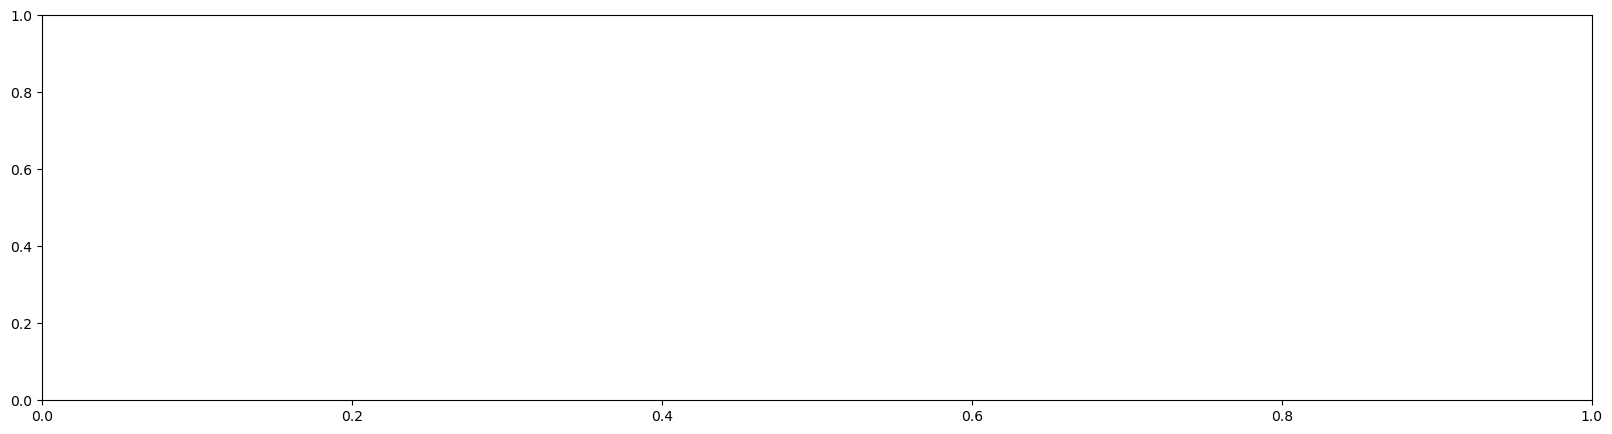

In [6]:
# послушаем примеры всех категорий
# часть категорий выбрана для теста, так как они наиболее близки к тому, что ожидается в реальных записях
# из них 20% сэмплов выделено для теста
# все остальные записи идут в трейн

for index, row in df_dd.iterrows():
    print('-------------------------------')
    print(row['category'])
    wav, sr = torchaudio.load(f"/kaggle/input/esc-50-noise/ESC-50-master/audio/{row['filename']}")
    print(visualize_audio(wav, sr=sr))
    print()

In [8]:
test_cats = ['dog', 'chirping_birds', 'vacuum_cleaner', 'thunderstorm',
       'door_wood_knock', 'can_opening', 'clapping', 'airplane', 'mouse_click', 'train',
       'keyboard_typing', 'wind', 'footsteps', 'helicopter', 'drinking_sipping','rain', 'insects', 'laughing', 
       'breathing', 'crying_baby', 'coughing',
       'washing_machine', 'clock_tick', 'sneezing', 'siren', 'cat', 'door_wood_creaks']

In [9]:
# всего выбрано 29 категорий шумов

len(test_cats)

27

In [23]:
df1 = df[df.category.isin(test_cats)].reset_index(drop=True)
df1

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A
...,...,...,...,...,...,...,...
1075,5-263775-A-26.wav,5,26,laughing,False,263775,A
1076,5-263775-B-26.wav,5,26,laughing,False,263775,B
1077,5-263902-A-36.wav,5,36,vacuum_cleaner,False,263902,A
1078,5-51149-A-25.wav,5,25,footsteps,False,51149,A


In [24]:
df2 = df[~df.category.isin(test_cats)].reset_index(drop=True)
df2

,filename,fold,target,category,esc10,src_file,take
0,1-103298-A-9.wav,1,9,crow,False,103298,A
1,1-115545-A-48.wav,1,48,fireworks,False,115545,A
2,1-115545-B-48.wav,1,48,fireworks,False,115545,B
3,1-115545-C-48.wav,1,48,fireworks,False,115545,C
4,1-115546-A-48.wav,1,48,fireworks,False,115546,A
...,...,...,...,...,...,...,...
915,5-261439-A-15.wav,5,15,water_drops,False,261439,A
916,5-262641-A-15.wav,5,15,water_drops,False,262641,A
917,5-263831-A-6.wav,5,6,hen,False,263831,A
918,5-263831-B-6.wav,5,6,hen,False,263831,B


In [25]:
# разделим шумы на train/test
# из каждой категории выделим 10% шумов для теста

train, test = train_test_split(df1, random_state=123, test_size=0.2, stratify=df1['category'])

In [26]:
train = train.append(df2).reset_index(drop=True)
train

/tmp/ipykernel_28/779906538.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(df2).reset_index(drop=True)


,filename,fold,target,category,esc10,src_file,take
0,1-19501-A-7.wav,1,7,insects,False,19501,A
1,3-152007-E-20.wav,3,20,crying_baby,True,152007,E
2,4-165933-A-45.wav,4,45,train,False,165933,A
3,2-73260-A-10.wav,2,10,rain,True,73260,A
4,5-156999-E-19.wav,5,19,thunderstorm,False,156999,E
...,...,...,...,...,...,...,...
1779,5-261439-A-15.wav,5,15,water_drops,False,261439,A
1780,5-262641-A-15.wav,5,15,water_drops,False,262641,A
1781,5-263831-A-6.wav,5,6,hen,False,263831,A
1782,5-263831-B-6.wav,5,6,hen,False,263831,B


In [27]:
import os
os.mkdir('/kaggle/working/esc50_noises_train')

In [28]:
train_filenames = set(train['filename'].values)

In [29]:
from pydub import AudioSegment
for root, dirs, files in os.walk('/kaggle/input/esc-50-noise/ESC-50-master/audio'):
    for filename in files:
        if filename in train_filenames:
            sound = AudioSegment.from_wav(os.path.join(root, filename))
            sound = sound.set_frame_rate(16000)
            sound = sound.set_channels(1)
            sound.export(f'/kaggle/working/esc50_noises_train/{filename}', format="wav")

In [30]:
import os
os.mkdir('/kaggle/working/esc50_noises_test')

In [31]:
test_filenames = set(test['filename'].values)

In [32]:
from pydub import AudioSegment
for root, dirs, files in os.walk('/kaggle/input/esc-50-noise/ESC-50-master/audio'):
    for filename in files:
        if filename in test_filenames:
            sound = AudioSegment.from_wav(os.path.join(root, filename))
            sound = sound.set_frame_rate(16000)
            sound = sound.set_channels(1)
            sound.export(f'/kaggle/working/esc50_noises_test/{filename}', format="wav")

In [ ]:
# output был скачан, создано два датасета, из папки тест и из папки трейн